# Group 31
#####-Muslim Malsagov
#####-Alptunç Sever
#####-Can Kayahan
#####-Can Elgezen

#Final Report:

# Introduction

In our project, we will be working on the [Google Play Store](https://www.kaggle.com/lava18/google-play-store-apps) and [Apple Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) datasets. The goal of the project is to analyze each category of applications and determine whether a category is more successful in Play Store or Apple Store. Considering that app developers often prioritize an operating system, for example Android vs. iOS, we plan to recommend a store to focus on depending on which category the developer's app is in, so that the developer may have more success.

To estimate the success of each category and each app in a category, we may utilize the means and standard deviations of ratings, install counts and review counts for each category and for all categories. We will try machine learning algorithm to predict the missing values of second dataset we work on to make the final comparison as accurate as possible

#Problem Definition

As it was mentioned in the Introduction, by working through and analyzing two Datasets (Google Play Store and Apple Store) we are searching for the most efficient and succesful decision for programmers to choose in which platform they want to create their program 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
playstore = pd.read_csv(path_prefix + '/googleplaystore.csv')


playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
applestore = pd.read_csv(path_prefix + "/AppleStore.csv")

applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


#I.Data Exploration and Utulized Datasets

(Datasets that was used in first part is related to GooglePlay store when the Apple Dataset will be used later)

I. First part of the work is to clean the dataframe we have. As it can be seen by table and part of code that there are many Nan values for rating and other aspects. Since this data will be more accurate without them, it is better to remove such apps that dont have specific information like "Rating" or "Type" of the application.

II. The second part is to sort the categories of dataframe by rating, amount of installs and amount of apps to understand which categories have bigger advantage towards others. Especially, since we will use a data analyze realted to the attributes of this dataset, it is important to correctly understand what the GoogleStore dataset has.



The Playstore after removing rows with NaN values:
                                                     App  ...         Android Ver
0        Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                   Coloring book moana  ...        4.0.3 and up
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                 Sketch - Draw & Paint  ...          4.2 and up
4                 Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                 ...  ...                 ...
9355                                      FR Calculator  ...          4.1 and up
9356                                   Sya9a Maroc - FR  ...          4.1 and up
9357                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
9358                      The SCP Foundation DB fr nn5n  ...  Varies with device
9359      iHoroscope - 2018 Daily Horoscope & Astrology  

<Figure size 1080x1080 with 0 Axes>

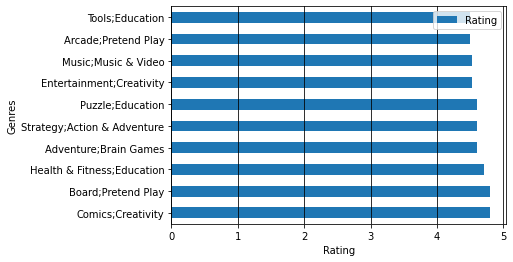

In [ ]:
#Muslim's cell to work on part A:

playstore=playstore.dropna(subset=["Rating","Type","Content Rating","Current Ver","Android Ver"])
playstore=playstore.reset_index(drop=True)
print("The Playstore after removing rows with NaN values:\n",playstore)

playstore_category=playstore.groupby("Genres")[["Rating"]].mean()#finding mean for each of parts
print("Top 10 categories with respect to rating:")#part 3
top10_=playstore_category.sort_values("Rating",ascending=False).head(10)#sorting the categories from top to buttom

print()
print (top10_)


plt.figure(figsize=(15,15))
top10_.plot.barh()
plt.xlabel("Rating")
plt.grid(axis="x", color="black")#using grid for x 

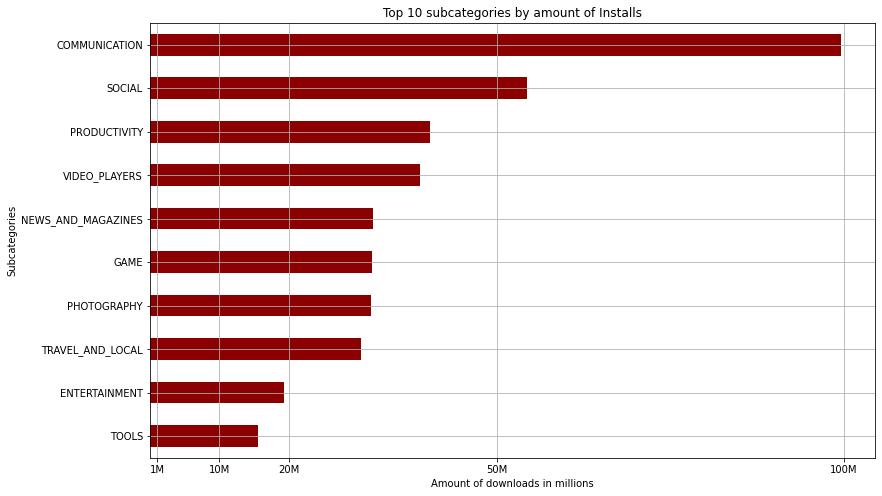

In [ ]:
#Muslim's part
import operator 
df = playstore.copy(deep = True)
#numeric conversion
df["Installs"] = df["Installs"].str.replace("\+|,", "", regex = True)
df["Installs"] = df["Installs"].str.replace("Free", "0", regex = True)
df["Installs"] = pd.to_numeric(df["Installs"])

import statistics as st
d={}
for i in playstore["Category"]:
  if i not in d: 
    rating=[]
    downloads=[]
    n=0
    for j in range(len(playstore["Category"])):
      if playstore["Category"][j] == i:
        n += 1
        rating.append(df["Rating"][j])
        downloads.append(df["Installs"][j]) 
    d[i]=[st.mean(rating),st.mean(downloads),n]

new_dic={}

for i in d:
  new_dic[i]=d[i][1]

sorted_d = dict( sorted(new_dic.items(), key=operator.itemgetter(1),reverse=True))
#part 2
top10=[]
for i in sorted_d:
  if len(top10)>=10:
    break
  top10.append(i)
x=[]
for i in top10:
  x.append(sorted_d[i])

plt.figure (figsize=(13,8))
plt.xticks([1000000,10000000,20000000,50000000,100000000],["1M","10M","20M","50M","100M"])
plt.title("Top 10 subcategories by amount of Installs")
plt.xlabel("Amount of downloads in millions")
plt.ylabel("Subcategories")

f_importances=pd.Series(x,index=top10)
f_importances.nsmallest(10).plot(kind='barh',grid=True,color="darkred")

Categories with lasrgest amount of apps:
                App
Category           
FAMILY         1746
GAME           1097
TOOLS           733
PRODUCTIVITY    351
MEDICAL         350
COMMUNICATION   328
FINANCE         323
SPORTS          319
PHOTOGRAPHY     317
LIFESTYLE       314


<Figure size 720x432 with 0 Axes>

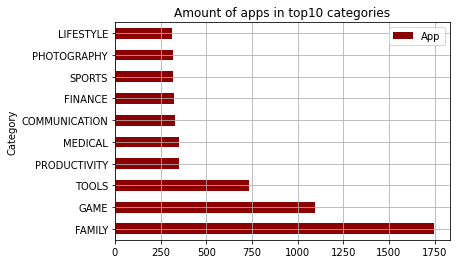

In [ ]:

data_ = playstore.copy(deep = True)

amount=data_.groupby('Category')[["App"]].count().sort_values(by="App")  #amount of apps in each category
print("Categories with lasrgest amount of apps:")
print(amount.nlargest(10,columns="App"))
plt.figure (figsize=(10,6))

amount.nlargest(10,columns="App").plot(title="Amount of apps in top10 categories",kind='barh',grid=True,color="darkred",linewidth=2)


In [ ]:
#Alptunç's part A for apple store dataset

ap = applestore.copy(deep = True)

print("Dataset shape before dropping rows with NaN values",ap.shape)

ap.dropna(subset=["rating_count_tot","user_rating","prime_genre"], inplace= True) #dropping NaN rows

print("Dataset shape after dropping rows with NaN values", ap.shape)
print("Turns out there aren't any rows with NaN values")

ap.rename(columns= {"rating_count_tot" : "Reviews", "user_rating" : "Rating", "prime_genre": "Category"}, inplace= True) #changed the column names so we can better use it with googleplaystore dataset

print("", "Columns with changed names",sep='\n')
print(ap[["Reviews", "Rating", "Category"]])

Dataset shape before dropping rows with NaN values (7197, 17)
Dataset shape after dropping rows with NaN values (7197, 17)
Turns out there aren't any rows with NaN values

Columns with changed names
      Reviews  Rating      Category
0       21292     4.0         Games
1      161065     4.0  Productivity
2      188583     3.5       Weather
3      262241     4.0      Shopping
4      985920     4.5     Reference
...       ...     ...           ...
7192      142     4.5         Games
7193       30     4.5         Games
7194       15     4.5     Utilities
7195       85     4.5         Games
7196        3     5.0         Games

[7197 rows x 3 columns]


###Data Exploration, Part 2:
In this section found the categorical means and categorical standard deviations for each category, Reviews and Rating means and standard deviations will be used to train our Machine Learning Model in order to predict the missing install values in apple store dataset. Install means are calculated and will be used to conclude which store to pick for the given category.



In [ ]:
#Can's cell for part B

cc = playstore.copy(deep = True)

cc = cc[cc['Category'] != '1.9'] #remove weird category

cc['Reviews'] = cc['Reviews'].str.replace('.0M','000000') #replace million sign with 6 zeros
cc['Reviews'] = pd.to_numeric(cc['Reviews'])

cc['Installs'] = cc['Installs'].str.replace('\+|,', '', regex = True) #remove + and ,
cc['Installs'] = pd.to_numeric(cc['Installs'])

categorical_means = cc.groupby('Category')[['Rating', 'Reviews', 'Installs']].mean()
categorical_stdevs = cc.groupby('Category')[['Rating', 'Reviews', 'Installs']].std()

print('Mean for each category\n',categorical_means.head())
print('\nStandard deviation for each category\n',categorical_stdevs.head())

Mean for each category
                        Rating        Reviews      Installs
Category                                                  
ART_AND_DESIGN       4.377049   28103.557377  2.036526e+06
AUTO_AND_VEHICLES    4.190411   15940.136986  7.278055e+05
BEAUTY               4.278571    9407.928571  6.408619e+05
BOOKS_AND_REFERENCE  4.346067  123363.258427  1.079377e+07
BUSINESS             4.121452   46053.089109  3.306165e+06

Standard deviation for each category
                        Rating        Reviews      Installs
Category                                                  
ART_AND_DESIGN       0.328326   71256.520679  6.865011e+06
AUTO_AND_VEHICLES    0.543692   46494.622574  1.866462e+06
BEAUTY               0.362603   21071.334910  1.691597e+06
BOOKS_AND_REFERENCE  0.429046  398244.577801  7.672449e+07
BUSINESS             0.624422  172732.109034  1.242359e+07


We found the mean and standard deviation for downloads, ratings and reviews in order to compare it with our "succesfull" goal with the machine learning models.

In [ ]:
#Alptunç's part B
db = playstore.copy(deep = True)

# print(db.loc[10472, "Installs"]) no longer needed to check the 10472'th row since in part a it is deleted.

print(db["Installs"].head())

db["Installs"] = db["Installs"].str.replace("\+|,", "", regex = True)
# db["Installs"] = db["Installs"].str.replace("Free", "0", regex = True) # set the Install value at row 10472 from "Free" to 0 - no longer needed done in part a
db["Reviews"] = db["Reviews"].str.replace(".0M","000000")


db["Installs"] = pd.to_numeric(db["Installs"])
db["Reviews"] = pd.to_numeric(db["Reviews"])

Installs_mean = db["Installs"].mean()
Reviews_mean = db["Reviews"].mean()
Rating_mean = db["Rating"].mean()
Install_std = db["Installs"].std()
Reviews_std = db["Reviews"].std()
Rating_std = db["Rating"].std()

print("Mean for Installs: ",Installs_mean)
print("Mean for Reviews: ", Reviews_mean)
print("Mean for Ratings: ", Rating_mean)

print("Standard Deviation for Installs: ",Install_std)
print("Standard Deviation for Reviews: ", Reviews_std)
print("Standard Deviation for Ratings: ", Rating_std)

# part B for applestore dataset

ap["Reviews"] = pd.to_numeric(ap["Reviews"])

ap_categorical_means = ap.groupby("Category")[["Rating", "Reviews"]].mean()
ap_categorical_std = ap.groupby("Category")[["Rating", "Reviews"]].std()

print("\n Mean for each Category in Apple Store Dataset\n")
print(ap_categorical_means.head())
print("\nStandard Deviation for each Category in Apple Store Dataset\n")
print(ap_categorical_std.head())

ap_Reviews_mean = ap["Reviews"].mean()
ap_Rating_mean = ap["Rating"].mean()
ap_Reviews_std = ap["Reviews"].std()
ap_Rating_std = ap["Rating"].std()

print("\nMean for Reviews in Apple Store:" , ap_Reviews_mean , "\n")
print("Mean for Ratings in Apple Store:" , ap_Rating_mean , "\n")
print("Standard Deviation for Reviews in Apple Store:" , ap_Reviews_std , "\n")
print("Standard Deviation for Ratings in Apple Store:" , ap_Rating_std , "\n")

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object
Mean for Installs:  17908749.138675213
Mean for Reviews:  514376.7052350427
Mean for Ratings:  4.191837606837612
Standard Deviation for Installs:  91266365.19271447
Standard Deviation for Reviews:  3145023.255620236
Standard Deviation for Ratings:  0.5152629700664079

 Mean for each Category in Apple Store Dataset

                 Rating      Reviews
Category                            
Book           2.477679  5125.437500
Business       3.745614  4788.087719
Catalogs       2.100000  1732.500000
Education      3.376380  2239.229581
Entertainment  3.246729  7533.678505

Standard Deviation for each Category in Apple Store Dataset

                 Rating       Reviews
Category                             
Book           2.190673  27733.547345
Business       1.254004   8967.641106
Catalogs       2.245984   4138.260538
Education      1.543311  11545.817944
Entertainment  1.43

###Machine Learning Models

We used a random forest model to predict the number of installs of each app in Apple Store, an information which was initially missing. We trained the random forest model on the Play Store dataset to predict the number of installs based on Size, Content Rating, Rating, Reviews, Category and Price attributes. We then later used the trained model on the Apple Store dataset to calculate the number of installs.

In [ ]:
ml1 = cc.copy(deep = True)

ml1 = ml1.drop(labels = ['Type', 'Last Updated', 'Current Ver', 'Android Ver', 'Genres'], axis = 1)

for i in range(ml1.index.array.size):
  s = ml1['Size'].values[i]
  if 'M' in s:
    s = s.replace('M', '')
    s = str(float(s) * 1024**2)
  elif 'k' in s:
    s = s.replace('k', '')
    s = str(float(s) * 1024)
  ml1['Size'].values[i] = s

ml1 = ml1.drop(ml1[ml1['Size'] == 'Varies with device'].index)
ml1['Size'] = pd.to_numeric(ml1['Size'])

ml1['Price'] = ml1['Price'].str.replace('$', '')
ml1['Price'] = pd.to_numeric(ml1['Price'])

ml1.loc[ml1['Content Rating'] == 'Everyone', 'Content Rating'] = 0
ml1.loc[ml1['Content Rating'] == 'Everyone 10+', 'Content Rating'] = 1
ml1.loc[ml1['Content Rating'] == 'Teen', 'Content Rating'] = 2
ml1.loc[ml1['Content Rating'] == 'Mature 17+', 'Content Rating'] = 3
ml1.loc[ml1['Content Rating'] == 'Adults only 18+', 'Content Rating'] = 4
ml1.loc[ml1['Content Rating'] == 'Unrated', 'Content Rating'] = 5

ml1['Content Rating'] = pd.to_numeric(ml1['Content Rating'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder = encoder.fit(ml1[['Category']])

ml1['Category'] = encoder.transform(ml1[['Category']])

ml1 = ml1.drop(labels = 'App', axis = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ml1 = ml1.dropna()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(criterion = 'entropy')

X = ml1.drop(labels = 'Installs', axis = 1)
y = ml1['Installs']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

rf = rf.fit(X_train, y_train)
pred = rf.predict(X_val)

acc = accuracy_score(y_val, pred)

print('Accuracy =', acc)

Accuracy = 0.5963777490297542


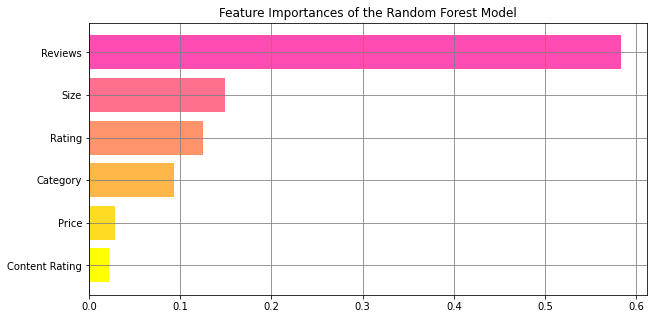

In [ ]:
from matplotlib import cm

imp = rf.feature_importances_
col_names = X_train.axes[1]

df_imp = pd.DataFrame([imp], columns = col_names)

df_imp = df_imp.sort_values(by = 0, axis = 1, ascending = False)

df_imp = df_imp.sort_values(by = 0, axis = 1).transpose()

clr = cm.spring(np.linspace(1, 0.3, 6))

fig, axes = plt.subplots(1, 1, figsize = (10, 5))

plt.barh(df_imp[0].index, df_imp[0].array, color = clr)
plt.grid(color = 'gray')
plt.title('Feature Importances of the Random Forest Model');

In [ ]:
ml2 = ap.copy(deep = True)

ml2 = ml2[['size_bytes', 'price', 'Reviews', 'Rating', 'cont_rating', 'Category']]

ml2.loc[ml2['cont_rating'] == '4+', 'cont_rating'] = 0
ml2.loc[ml2['cont_rating'] == '9+', 'cont_rating'] = 1
ml2.loc[ml2['cont_rating'] == '12+', 'cont_rating'] = 2
ml2.loc[ml2['cont_rating'] == '17+', 'cont_rating'] = 3

ml2['cont_rating'] = pd.to_numeric(ml2['cont_rating'])

ml2['Category'] = ml2['Category'].str.upper()
ml2['Category'] = ml2['Category'].str.replace('&', 'AND')
ml2['Category'] = ml2['Category'].str.replace(' ', '_')
ml2.loc[ml2['Category'] == 'GAMES', 'Category'] = 'GAME'
ml2.loc[ml2['Category'] == 'REFERENCE', 'Category'] = 'BOOKS_AND_REFERENCE'
ml2.loc[ml2['Category'] == 'BOOK', 'Category'] = 'BOOKS_AND_REFERENCE'
ml2.loc[ml2['Category'] == 'CATALOGS', 'Category'] = 'BOOKS_AND_REFERENCE'
ml2.loc[ml2['Category'] == 'UTILITIES', 'Category'] = 'TOOLS'
ml2.loc[ml2['Category'] == 'MUSIC', 'Category'] = 'ENTERTAINMENT'
ml2.loc[ml2['Category'] == 'TRAVEL', 'Category'] = 'TRAVEL_AND_LOCAL'
ml2.loc[ml2['Category'] == 'NAVIGATION', 'Category'] = 'TRAVEL_AND_LOCAL'
ml2.loc[ml2['Category'] == 'SOCIAL_NETWORKING', 'Category'] = 'COMMUNICATION'
ml2.loc[ml2['Category'] == 'PHOTO_AND_VIDEO', 'Category'] = 'PHOTOGRAPHY'
ml2.loc[ml2['Category'] == 'NEWS', 'Category'] = 'NEWS_AND_MAGAZINES'

new_categories = ml2['Category']

ml2['Category'] = encoder.transform(ml2[['Category']])

ml2 = ml2.rename(columns = {'size_bytes': 'Size', 'price': 'Price', 'cont_rating': 'Content Rating'})

pred2 = rf.predict(ml2)

apple_installs = pd.DataFrame(pred2, columns = ['Installs'])

applestore2 = ap.copy(deep = True)
applestore2['Installs'] = apple_installs
applestore2['Category'] = new_categories

applestore2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Unnamed: 0,id,track_name,size_bytes,currency,price,Reviews,rating_count_ver,Rating,user_rating_ver,ver,cont_rating,Category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Installs
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,GAME,38,5,10,1,1000000
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,PRODUCTIVITY,37,5,23,1,5000000
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,WEATHER,37,5,3,1,10000000
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,SHOPPING,37,5,9,1,10000000
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,BOOKS_AND_REFERENCE,37,5,45,1,5000000


In [ ]:
apple_categorical_means = applestore2.groupby('Category')[['Installs']].mean()

#categorical_means['Installs'].dtypes
#apple_categorical_means['Installs'] = pd.to_numeric(apple_categorical_means['Installs']),

drop1 = categorical_means.drop(labels = apple_categorical_means.index)
drop2 = categorical_means.drop(labels = drop1.index)['Installs']

drop2 = drop2.rename('Play Store Installs')
apple_categorical_means = apple_categorical_means.rename(columns = {'Installs': 'Apple Store Installs'})

new = pd.concat([drop2, apple_categorical_means], axis = 1)

pstoresums = new['Play Store Installs'].sum()
astoresums = new['Apple Store Installs'].sum()

new['Play Store Installs Percentages'] = 0
new['Apple Store Installs Percentages'] = 0
new['Recommendation'] = ''

new['Play Store Installs Percentages'] = new['Play Store Installs'] * 100 / pstoresums
new['Apple Store Installs Percentages'] = new['Apple Store Installs'] * 100 / astoresums

for i in range(new.index.array.size):
  if new['Play Store Installs Percentages'].values[i] > new['Apple Store Installs Percentages'].values[i]:
    new['Recommendation'].values[i] = 'Play Store'
  else:
    new['Recommendation'].values[i] = 'Apple Store'

new.head(20)

,Play Store Installs,Apple Store Installs,Play Store Installs Percentages,Apple Store Installs Percentages,Recommendation
Category,,,,,
BOOKS_AND_REFERENCE,1.079377e+07,311806.559140,3.013918,3.560122,Apple Store
BUSINESS,3.306165e+06,250237.017544,0.923172,2.857138,Apple Store
COMMUNICATION,9.953427e+07,841996.167665,27.792707,9.613683,Play Store
EDUCATION,5.621626e+06,155362.317881,1.569713,1.773885,Apple Store
ENTERTAINMENT,1.925611e+07,364764.190193,5.376835,4.164778,Play Store
FINANCE,2.713970e+06,579798.365385,0.757815,6.619980,Apple Store
FOOD_AND_DRINK,2.511722e+06,504635.555556,0.701342,5.761791,Apple Store
GAME,3.198347e+07,484597.099948,8.930663,5.532998,Play Store
HEALTH_AND_FITNESS,5.330156e+06,337950.333333,1.488326,3.858625,Apple Store


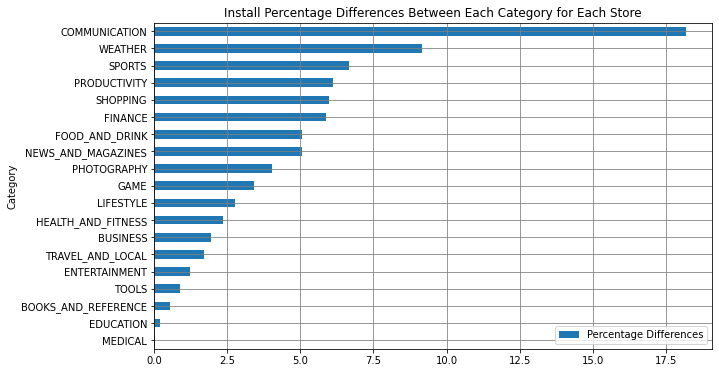

In [ ]:
percentage_diffs = new.copy(deep = True)

percentage_diffs['Percentage Differences'] = abs(percentage_diffs['Play Store Installs Percentages'] - percentage_diffs['Apple Store Installs Percentages'])

percentage_diffs = percentage_diffs[['Percentage Differences']].sort_values(by = 'Percentage Differences')

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

percentage_diffs.plot.barh(ax = axes)
plt.grid(color = 'gray')
plt.title('Install Percentage Differences Between Each Category for Each Store');

#Conclusion

As it can be seen from final cells (regarding machine learning algorithm), by using machine learning method we were able to predict the amount of installs for each app of Apple Store and afterwards of its categories from the inputs of PlayStore. In the cell with table we can see the different data. (mean of installs for both platforms,their percantages and a final conlumn) The final column is giving a final decision, and the final part previous work was made for. By this table, it is easy to determine which platform is more suitable for the spicific app the programmer wants to create

Also, from the last graph it can be seen a percentage difference between GooglePlay Store and Apple Store, since the amount of downloads in GooglePlay store was much higher than Appstore, it was decided to use a percentages (last table) for each store to detemine how they differ for more accurate comparison. 

However, for categories as "Game", "Photography" and the ones above in the table (that has a percentage difference higher than 2.5%) we recommend to choose a GooglePlay Store, since the difference in amount of installs between them is starting to rapidly increase.

### Work Division
The work was done by 3 members of this grup. Muslim Malsagov worked on part I and partially on the last parts related to the final table and graph . Alptunc Sever worked on part II and partially on last parts too. Can Elgezen worked on last parts related to 'Machine Learning Models' section and last cells+ partially on part II.